In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [18]:
df=pd.get_dummies(df,drop_first=True)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
y=df['Exited']
x=df.drop(columns=['Exited'])

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
x_train_trf=scaler.fit_transform(x_train)
x_test_trf=scaler.transform(x_test)

In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model=Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history=model.fit(x_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7342 - loss: 0.6202 - val_accuracy: 0.7969 - val_loss: 0.5110
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8044 - loss: 0.4991 - val_accuracy: 0.7969 - val_loss: 0.5013
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7982 - loss: 0.5006 - val_accuracy: 0.7969 - val_loss: 0.5005
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7957 - loss: 0.5037 - val_accuracy: 0.7969 - val_loss: 0.5001
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7885 - loss: 0.5140 - val_accuracy: 0.7969 - val_loss: 0.4999
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7919 - loss: 0.5087 - val_accuracy: 0.7969 - val_loss: 0.4994
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7942 - loss: 0.5046 - val_accuracy: 0.7969 - val_loss: 0.4991
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7951 - loss: 0.5033 - val_accu

In [30]:
y_pred=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [31]:
y_pred

array([[0.17817956],
       [0.17817956],
       [0.25193   ],
       ...,
       [0.25193   ],
       [0.25175932],
       [0.17817956]], dtype=float32)

In [32]:
y_test

,Exited
9394,0
898,1
2398,0
5906,0
2343,0
...,...
1037,0
2899,0
9549,0
2740,0


In [35]:
y_pred_test=[]
for i in y_pred:
  if i<=0.5:
    y_pred_test.append(0)
  else:
    y_pred_test.append(1)
y_pred_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

0.7975

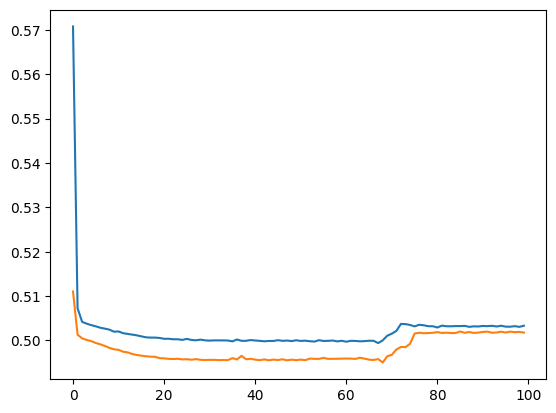

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [38]:
df=pd.read_csv('diabetes.csv')

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
y=df['Outcome']
x=df.drop(columns=['Outcome'])

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
scaler=StandardScaler()

In [43]:
x_train_trf=scaler.fit_transform(x_train)
x_test_trf=scaler.transform(x_test)

In [44]:
model=Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=8))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 375 (1.46 KB)

 Trainable params: 375 (1.46 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
history=model.fit(x_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4092 - loss: 0.8132 - val_accuracy: 0.3171 - val_loss: 0.8409
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3731 - loss: 0.7968 - val_accuracy: 0.3171 - val_loss: 0.7955
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3749 - loss: 0.7623 - val_accuracy: 0.3171 - val_loss: 0.7586
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3764 - loss: 0.7376 - val_accuracy: 0.3171 - val_loss: 0.7296
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4241 - loss: 0.7063 - val_accuracy: 0.3171 - val_loss: 0.7074
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4167 - loss: 0.7010 - val_accuracy: 0.6016 - val_loss: 0.6891
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5817 - loss: 0.6885 - val_accuracy: 0.6748 - val_loss: 0.6747
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6237 - loss: 0.6807 - val_accuracy: 0.

In [48]:
y_pred=model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [49]:
y_pred

array([[0.35907274],
       [0.35077432],
       [0.35075906],
       [0.38009366],
       [0.3507591 ],
       [0.3507591 ],
       [0.39733022],
       [0.38002685],
       [0.45862216],
       [0.45788857],
       [0.45862213],
       [0.411342  ],
       [0.35075957],
       [0.43123162],
       [0.35054114],
       [0.3507591 ],
       [0.35075906],
       [0.3507591 ],
       [0.35075945],
       [0.35441247],
       [0.3507591 ],
       [0.3507591 ],
       [0.35909358],
       [0.35138458],
       [0.4396849 ],
       [0.351373  ],
       [0.3507591 ],
       [0.35099718],
       [0.3507591 ],
       [0.3507591 ],
       [0.3800514 ],
       [0.35075915],
       [0.35310957],
       [0.452837  ],
       [0.3507591 ],
       [0.3507591 ],
       [0.35174733],
       [0.3507591 ],
       [0.3507594 ],
       [0.3507591 ],
       [0.35083732],
       [0.3507591 ],
       [0.3507591 ],
       [0.35535637],
       [0.45862293],
       [0.35086912],
       [0.3507591 ],
       [0.352

In [50]:
y_test

,Outcome
661,1
122,0
113,0
14,1
529,0
...,...
476,1
482,0
230,1
527,0


In [52]:
y_pred_test=[]
for i in y_pred:
  if i<=0.5:
    y_pred_test.append(0)
  else:
    y_pred_test.append(1)

In [53]:
accuracy_score(y_test,y_pred_test)

0.6948051948051948

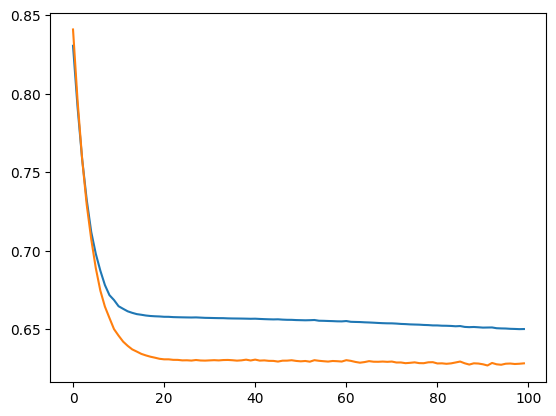

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])